# Eurogenes Project  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram , linkage
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import label_binarize
from sklearn.cluster import HDBSCAN

In [2]:
df = pd.read_csv('../Genetic_project/g25_data.csv')

df.head()

,Population,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
0,Abazin:KCHE-1032,0.109270,0.072103,-0.023004,-0.016796,-0.028005,0.003347,0.003055,-0.010384,-0.049904,...,-0.010740,-0.001173,-0.004054,-0.006662,0.023386,0.004742,-0.000124,-0.000863,-0.010965,-0.001916
1,Abazin:KCHE-1283,0.109270,0.071087,-0.026398,-0.014535,-0.034776,-0.000558,0.012221,0.003923,-0.058698,...,-0.003845,0.015646,-0.001014,0.002388,0.020135,-0.000998,-0.001607,-0.002218,-0.009640,-0.003592
2,Abazin:KCHE-1294,0.110408,0.078196,-0.024136,-0.016150,-0.025235,0.005299,0.009870,-0.007384,-0.040087,...,-0.020551,-0.004955,-0.003927,-0.007165,0.007253,0.010232,0.007172,0.001849,0.001084,-0.004550
3,Abazin:KCHE-1330,0.103579,0.086320,-0.024890,-0.015504,-0.032006,0.002231,0.011516,-0.002769,-0.059925,...,-0.014585,0.001565,-0.007095,-0.017975,0.022636,0.014100,0.009027,-0.003944,-0.009278,-0.003233
4,Abazin:KCHE-1333,0.104717,0.066009,-0.019987,-0.020995,-0.028313,-0.007809,0.012926,-0.007384,-0.043359,...,-0.005701,0.019818,-0.001520,-0.003645,0.024512,0.010731,-0.005070,-0.002958,-0.009399,-0.002515


In [3]:
df.tail()

,Population,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
9196,Zhuang:Zhuang08,0.017073,-0.446833,-0.032432,-0.061693,0.101865,0.051316,0.007520,-0.005307,-0.018816,...,0.002917,0.004303,-0.006841,-0.000126,-0.003877,0.008610,0.011376,0.016515,0.002289,-0.005269
9197,Zhuang:Zhuang09,0.012521,-0.448864,-0.030547,-0.060724,0.118791,0.059683,-0.002350,-0.006231,-0.024134,...,0.015513,0.005215,-0.002534,-0.002011,-0.018384,0.019091,0.000495,0.021568,0.004699,-0.000718
9198,Zhuang:Zhuang10,0.013659,-0.441755,-0.052043,-0.058463,0.123408,0.059125,-0.007520,-0.016153,-0.018203,...,0.000928,-0.000913,-0.003801,-0.004399,-0.017008,0.003119,0.002844,0.009367,0.001687,-0.004191
9199,Zhuang:Zhuang11,0.018212,-0.450895,-0.029793,-0.069768,0.111098,0.049921,0.000235,-0.010846,-0.018203,...,0.000000,-0.000261,0.006714,0.006159,-0.018259,0.014350,0.009645,0.020582,-0.003615,0.003353
9200,Zhuang:Zhuang16,0.013659,-0.447848,-0.042992,-0.062339,0.124639,0.059404,-0.000940,-0.010153,-0.020248,...,0.007955,0.003912,-0.001394,-0.003142,-0.008254,0.009234,0.008037,0.008134,-0.003012,0.007544


In [4]:
df.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25
count,9201.000000,9201.000000,9201.000000,9201.000000,9201.000000,9201.000000,9201.000000,9201.000000,9201.000000,9201.000000,...,9201.000000,9201.000000,9201.000000,9201.000000,9201.000000,9201.000000,9201.000000,9201.000000,9201.000000,9201.000000
mean,0.031649,-0.026353,-0.009387,0.004966,0.004132,0.009975,-0.001343,0.000455,0.003087,0.001555,...,-0.000089,-0.000345,0.000260,-0.001250,0.000334,0.000602,0.000848,0.001992,0.001333,0.002476
std,0.168656,0.211929,0.069668,0.057554,0.052708,0.033525,0.030830,0.034541,0.031319,0.023551,...,0.010874,0.010517,0.012609,0.010713,0.009884,0.009042,0.011869,0.008403,0.007237,0.011061
min,-0.654483,-0.464097,-0.267756,-0.133400,-0.165262,-0.522920,-0.334890,-0.404060,-0.078742,-0.113898,...,-0.045346,-0.044331,-0.057770,-0.195083,-0.039519,-0.085599,-0.068380,-0.055831,-0.029643,-0.076640
25%,0.023903,-0.145221,-0.047894,-0.041990,-0.037545,-0.008646,-0.002820,-0.002308,-0.013499,-0.011481,...,-0.006629,-0.007171,-0.002787,-0.004902,-0.006003,-0.004367,-0.003586,-0.002835,-0.003253,-0.002874
50%,0.080814,0.083273,-0.003394,0.000969,0.010771,0.010040,0.002350,0.003231,0.000205,0.002369,...,0.000000,0.000130,0.000127,-0.000251,-0.000250,0.000374,0.001113,0.001232,0.000843,0.000838
75%,0.117238,0.136081,0.047517,0.049419,0.039084,0.027331,0.006815,0.009461,0.013499,0.016766,...,0.006497,0.006650,0.003041,0.003897,0.005753,0.005490,0.006183,0.005793,0.005181,0.005029
max,0.145694,0.172640,0.164047,0.318803,0.213578,0.081436,0.376017,0.056305,0.123123,0.087656,...,0.052638,0.066365,0.580360,0.046005,0.048773,0.059894,0.052676,0.069265,0.037957,0.055684


# Perform PCA


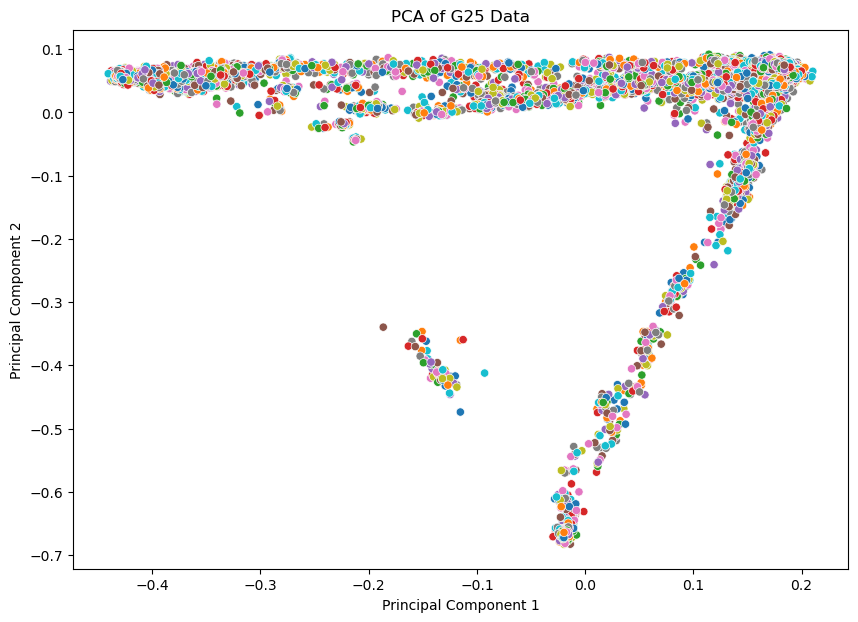

Explained Variance: PC1: 50.19%, PC2: 30.66%


In [5]:
labels = df.iloc[:, 0]  
data = df.iloc[:, 1:]

pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# visualization 
df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Label'] = labels
df_pca = df_pca.dropna()

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Label", palette="tab10", legend=False)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of G25 Data")
plt.show()

variance = pca.explained_variance_ratio_ * 100
print(f"Explained Variance: PC1: {variance[0]:.2f}%, PC2: {variance[1]:.2f}%")

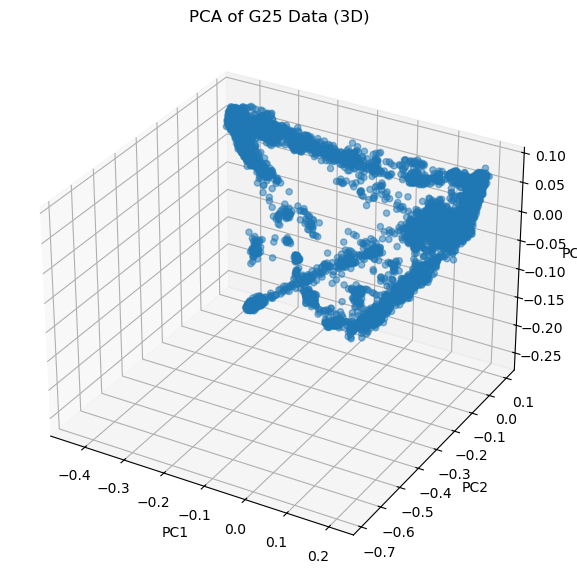

In [6]:
pca_3d = PCA(n_components=3)
pca_result_3d = pca_3d.fit_transform(data)

df_pca_3d = pd.DataFrame(pca_result_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['Label'] = labels

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca_3d["PC1"], df_pca_3d["PC2"], df_pca_3d["PC3"], alpha=0.5)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA of G25 Data (3D)")

plt.show()

# Clustering 

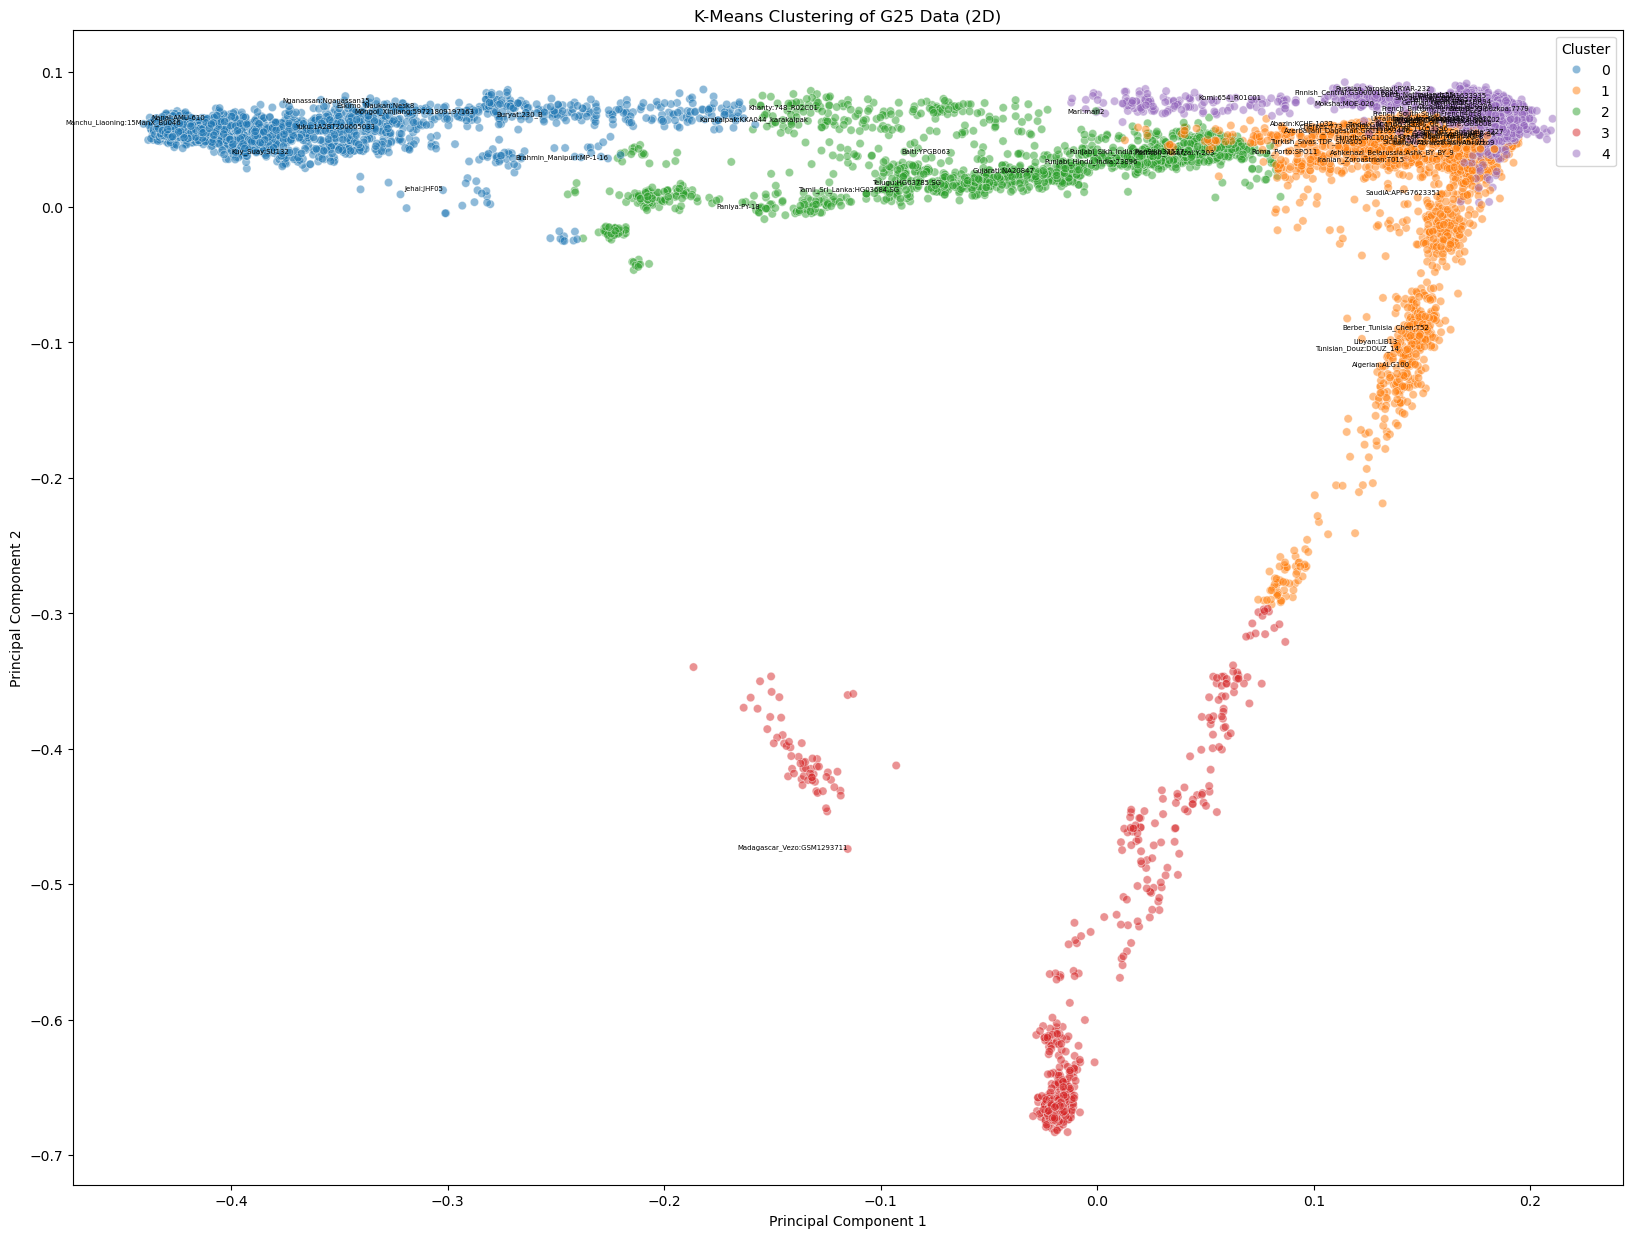

In [7]:
#K_means clustering
num_cluster = 5 
kmeans = KMeans(n_clusters=num_cluster ,random_state = 42 , n_init = 10)
clusters = kmeans.fit_predict(data) 

df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters
df_pca['Label'] = labels

plt.figure(figsize=(20, 15))
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="Cluster", palette="tab10", alpha=0.5)

# Label some points (in this case for every 150 points )
sampled_df = df_pca.iloc[::150, :]

for PC1, PC2, label in zip(sampled_df["PC1"], sampled_df["PC2"], sampled_df["Label"]):
    plt.text(PC1, PC2, label, fontsize=5, ha='right')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering of G25 Data (2D)")
plt.legend(title="Cluster")
plt.show()

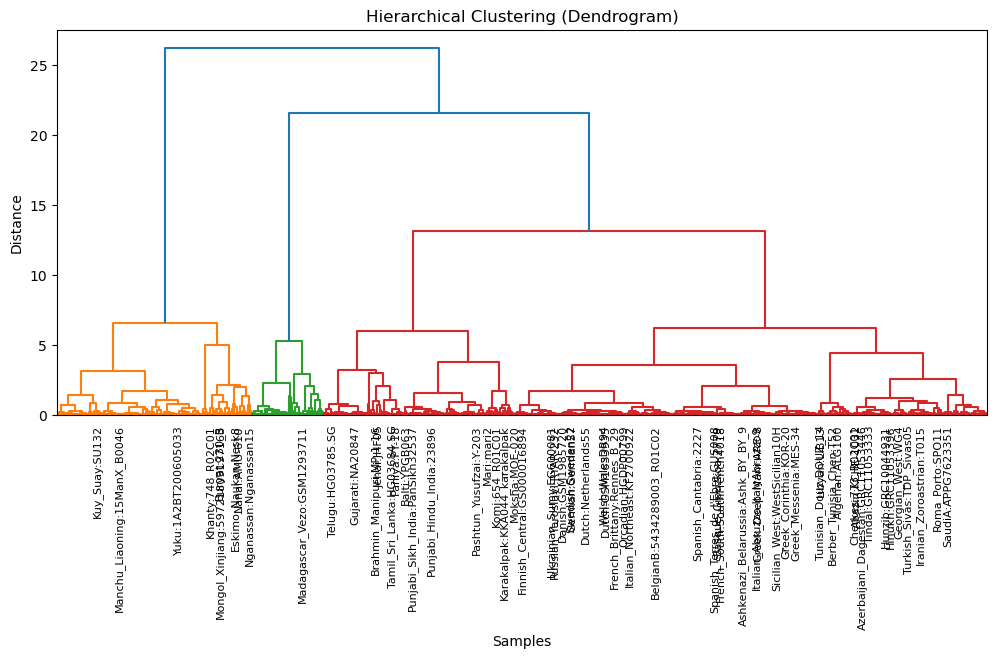

In [8]:
# HIERARCHICAL CLUSTERING 
linked = linkage(data, method='ward')

# point some samples 
sampled_labels = []
for i, label in enumerate(labels):
    if i % 150 == 0:  
        sampled_labels.append(label)
    else:
        sampled_labels.append("")  

# Visualize the dendrogram
plt.figure(figsize=(12, 5))
dendrogram(linked, labels=sampled_labels, leaf_rotation=90, leaf_font_size=8)

plt.title("Hierarchical Clustering (Dendrogram)")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.show()